In [5]:
%pip install WordCloud     

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.8/220.8 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  DEPRECATION: WordCloud is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Running setup.py install for WordCloud ... done
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd 
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud, STOPWORDS     

In [3]:
businesses = pd.read_json("yelp_academic_dataset_business.json", lines=True, orient='columns', chunksize=100000)

In [4]:
for business in businesses:
    subset_business = business
display(subset_business.head(2))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
100000,NufdL7rkU7dtWLq1-xMkYg,Image West Hair Design,2885 West Broadway Avenue,Vancouver,BC,V6K 2G6,49.264229,-123.170038,4.5,26,1,"{'GoodForKids': 'True', 'BusinessParking': '{'...","Beauty & Spas, Hair Salons","{'Monday': '11:0-18:0', 'Tuesday': '10:0-18:0'..."
100001,B5gJBIxHERjcqpQinbXwJA,VCA Sheeler Road Animal Hospital,547 Sheeler Ave,Apopka,FL,32703,28.671495,-81.492212,4.0,6,1,None,"Pet Sitting, Veterinarians, Pet Services, Pets...","{'Monday': '7:30-17:30', 'Tuesday': '7:30-17:3..."


In [27]:
subset_business.shape 

(60585, 14)

In [5]:
subset_business['name'].nunique() #number of businesses appear in the dataset 

50452

In [6]:
subset_business['categories'].nunique()

36949

In [7]:
subset_business['categories'].isna().mean()

0.0008582982586448791

In [8]:
df_business = subset_business[subset_business['categories'].notna()] #take out missing ones
df_business.shape

(60533, 14)

In [9]:
import re 
cat_temp1 = ';'.join(df_business['categories'])
cat_temp2 = re.split(';|,', cat_temp1)
bus_cat_trim = [item.lstrip() for item in cat_temp2]
df_bus_cat = pd.DataFrame(bus_cat_trim,columns=['category'])

Text(0.5, 0, 'Categories')

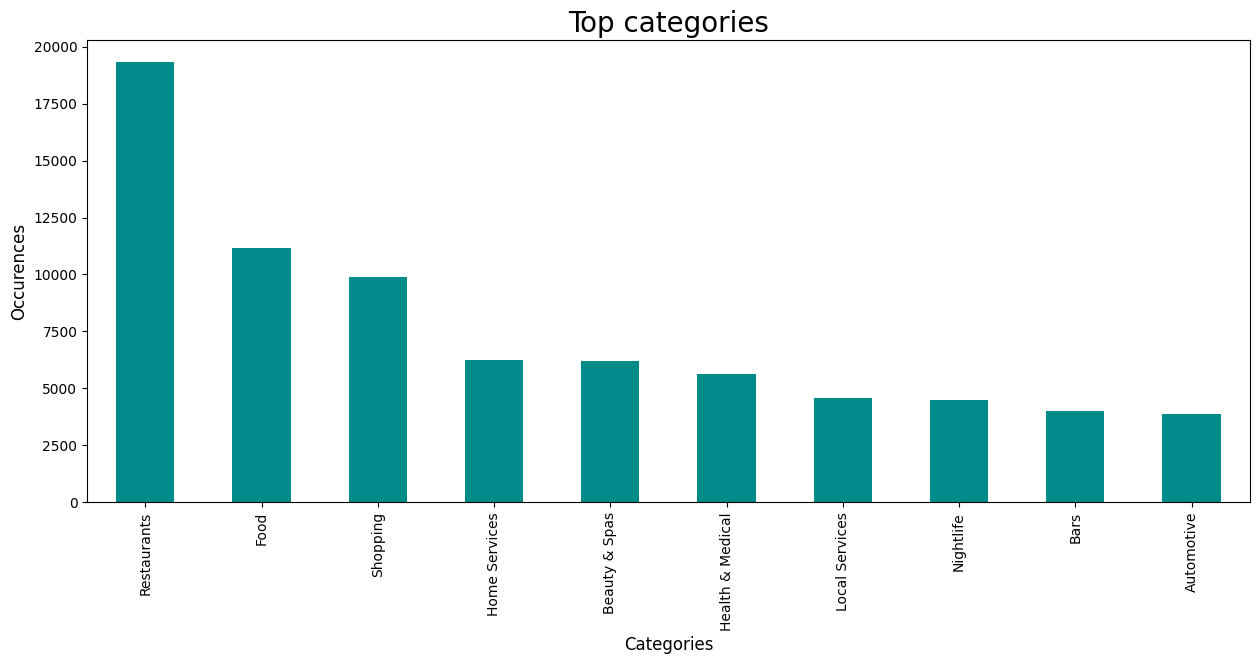

In [10]:
plt.figure(figsize=(15,6))
bus_cat_count = df_bus_cat.category.value_counts()
bus_cat_count = bus_cat_count.sort_values(ascending = False)
bus_cat_count = bus_cat_count.iloc[0:10]
bus_cat_count.plot(kind='bar',color='Darkcyan')
plt.title("Top categories",fontsize = 20)
plt.ylabel('Occurences', fontsize = 12)
plt.xlabel('Categories', fontsize = 12)

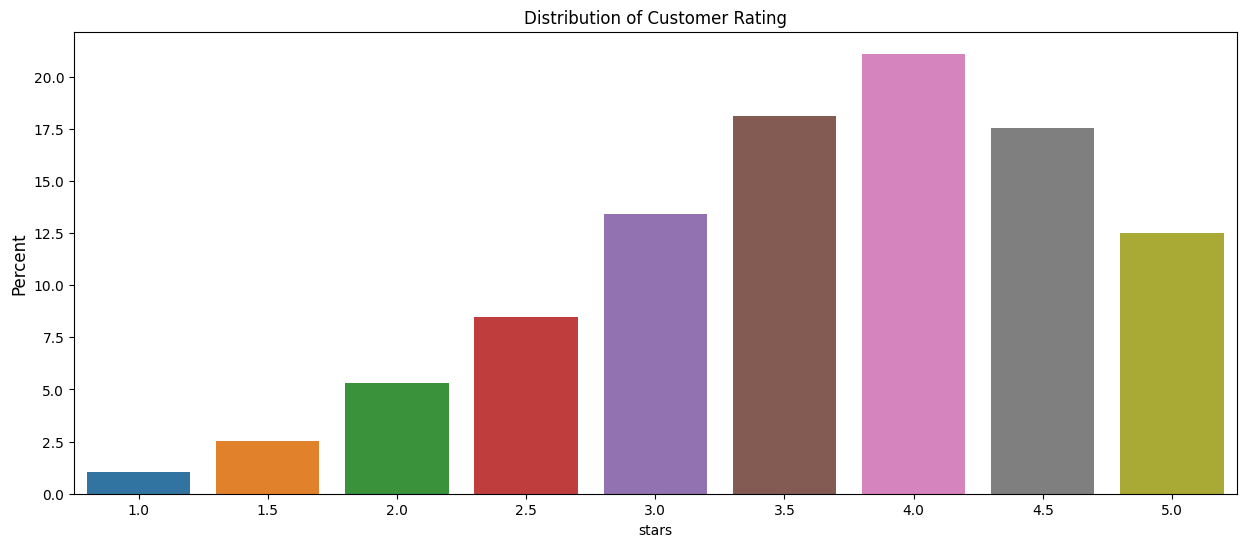

In [11]:
#Distribution of Customer Rating
plt.figure(figsize=(15,6))
ax = sns.barplot(data=subset_business, x='stars', y='stars', estimator=lambda x: len(x) / len(subset_business) * 100)
plt.ylabel('Percent', fontsize = 12)
plt.title('Distribution of Customer Rating')
plt.show()

In [12]:
# Create dataframe having only Restaurant business.
all_cities = subset_business[subset_business['categories'].str.contains('Rest.*')==True]

# Creating dummies dataframe from series for 'categories' 
df_rest = pd.Series(all_cities['categories']).str.get_dummies(',')

df_rest.drop(["Restaurants", " Restaurants", "Food", " Food"], axis=1, inplace=True)
# Removing the whitespaces from the column names
df_rest.columns = df_rest.columns.str.lstrip()
# Adding up all the rows to get the sum of columns and merging the columns with same names
all_rest = df_rest.groupby(by=df_rest.columns, axis=1).sum()

In [13]:
# Extracting name of all the cities
from_business = all_cities[['city']]

In [14]:
from_business.head()

,city
100002,Beaverton
100004,Brookline
100005,Atlanta
100010,Vancouver
100016,Norwood


In [15]:
#find top cities with the most restaurant 
lol=from_business['city'].value_counts()
lol2=lol.head(20)
lol2.head()

Portland     2140
Vancouver    1928
Austin       1922
Atlanta      1603
Orlando      1460
Name: city, dtype: int64

Text(0.5, 0, 'City')

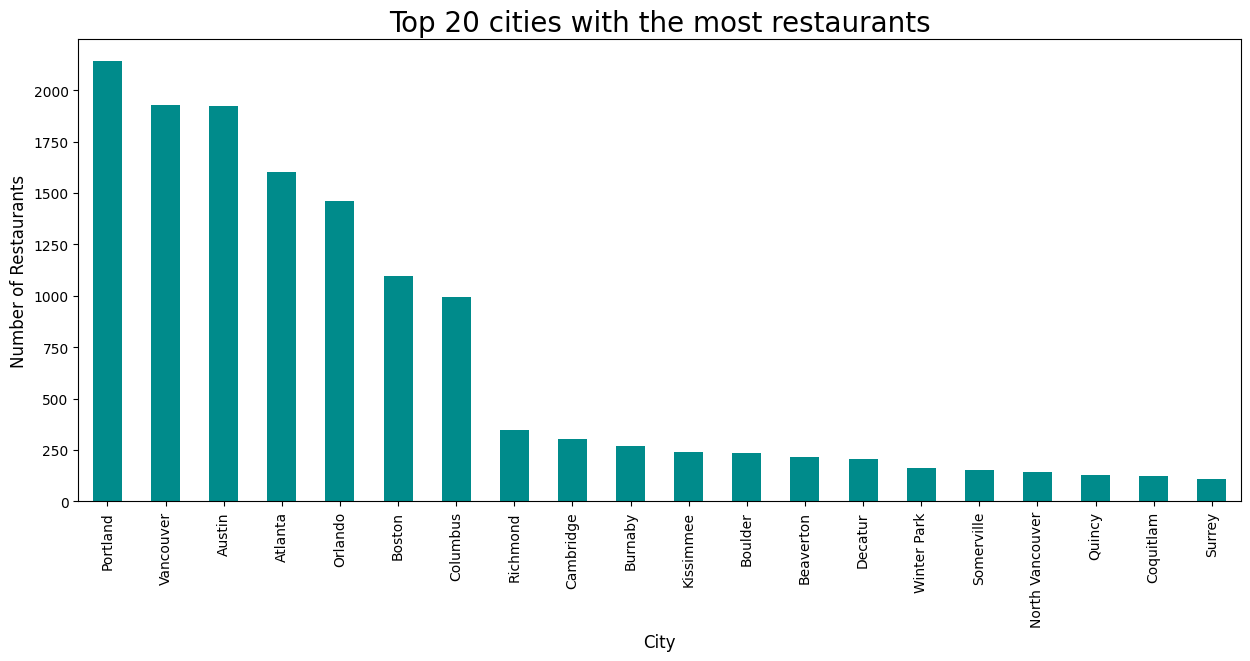

In [16]:
plt.figure(figsize=(15,6))
lol2.plot(kind='bar',color='Darkcyan') 
plt.title("Top 20 cities with the most restaurants",fontsize = 20)
plt.ylabel('Number of Restaurants', fontsize = 12)
plt.xlabel('City', fontsize = 12)

In [17]:
all_rest.join(from_business).groupby('city').sum()['Italian'].sort_values(ascending=False)

city
Boston        136
Portland      114
Orlando       114
Vancouver     109
Austin         96
             ... 
Lake City       0
Lincoln         0
Lithonia        0
Lithopolis      0
portland        0
Name: Italian, Length: 344, dtype: int64

In [18]:
plt.figure(figsize=(15,6))
all_rest.join(from_business).groupby('city').sum()['Italian'].sort_values(ascending=True).tail(10)\
                .plot(kind='barh',color='Darkcyan'

SyntaxError: '(' was never closed (3971435101.py, line 3)

In [19]:
Boston = all_rest.join(subset_business)[all_rest.join(subset_business)['city'] == 'Boston']
bos_1 = Boston[['Italian','name','address','latitude','longitude','stars','is_open','hours']]

# Sorting data as per their star ratings.
bos_1[ (bos_1['Italian']==1) & (Boston['is_open']==1) ].sort_values(by='stars',ascending=False).head(10)

,Italian,name,address,latitude,longitude,stars,is_open,hours
127994,1,Domenic's,54 Salem St,42.363199,-71.056278,4.5,1,"{'Monday': '0:0-0:0', 'Wednesday': '16:30-22:0..."
102252,1,Mangia Mangia,147 Endicott St,42.365099,-71.057248,4.5,1,"{'Monday': '8:0-14:0', 'Tuesday': '8:0-14:0', ..."
133603,1,SRV Boston,569 Columbus Ave,42.340918,-71.081615,4.5,1,"{'Monday': '0:0-0:0', 'Wednesday': '17:0-23:0'..."
150630,1,Bar Mezzana,360 Harrison Ave,42.344576,-71.063579,4.5,1,"{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'..."
131942,1,Boston Segway Tours,199 State St,42.359333,-71.052573,4.5,1,"{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
111397,1,Scopa,319 Hanover St,42.364025,-71.054115,4.5,1,"{'Monday': '12:0-22:0', 'Tuesday': '12:0-22:0'..."
110751,1,Zia Gianna,1735-1741 Dorchester Ave,42.290980,-71.063069,4.5,1,"{'Tuesday': '8:0-14:0', 'Wednesday': '8:0-14:0..."
147250,1,Rinas Pizzeria & Cafe,371 Hanover St,42.364888,-71.053142,4.5,1,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
110090,1,Galleria Umberto,289 Hanover St,42.363708,-71.054280,4.5,1,"{'Monday': '11:0-15:0', 'Tuesday': '11:0-15:0'..."
149207,1,Stoked Wood Fired Pizza,,42.361311,-71.048291,4.5,1,"{'Monday': '0:0-0:0', 'Tuesday': '11:0-20:0', ..."


In [20]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [21]:
import folium
import pandas as pd
from folium.plugins import MarkerCluster

In [22]:
data = bos_1[ (bos_1['Italian']==1) & (Boston['is_open']==1) ].sort_values(by='stars',ascending=False)\
            [['longitude','latitude','name','address','stars','hours']].head(20)
 
# create an empty map
Boston_Italian_restaurant_map = folium.Map(location=[42.3601,-71.0589], tiles='Stamen Terrain') 
# add marker one by one on the map
for i in range(0, len(data)):
    text = folium.Html('<b>Name: </b>'+ data.iloc[i]['name'] + "<hr style='margin:10px;'>" + 
                       "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>" +
                       "<li>Star: " + str(data.iloc[i]['stars']) + "</li>" +
                       "<li>Address: " + str(data.iloc[i]['address']) + "</li>" +
                       "<li>Hours: " + str(data.iloc[i]['hours']) + "</li>", script=True)

    popup = folium.Popup(text, max_width=2650)
    folium.Marker([ data.iloc[i]['latitude'], data.iloc[i]['longitude'] ], popup=popup).add_to(Boston_Italian_restaurant_map)



In [23]:
Boston_Italian_restaurant_map

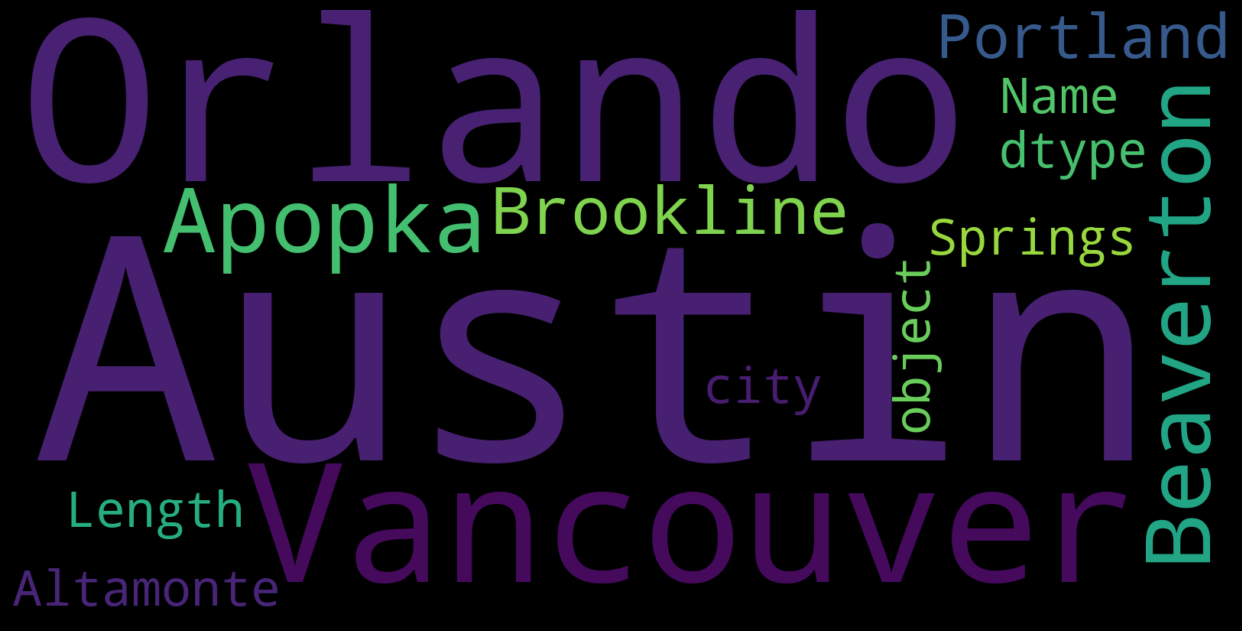

In [57]:
wc = WordCloud(width=1600, height=800, random_state=42, max_words=1000000)

# generation
wc.generate(str(subset_business["city"]))

plt.figure(figsize=(15,10), facecolor='black')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)


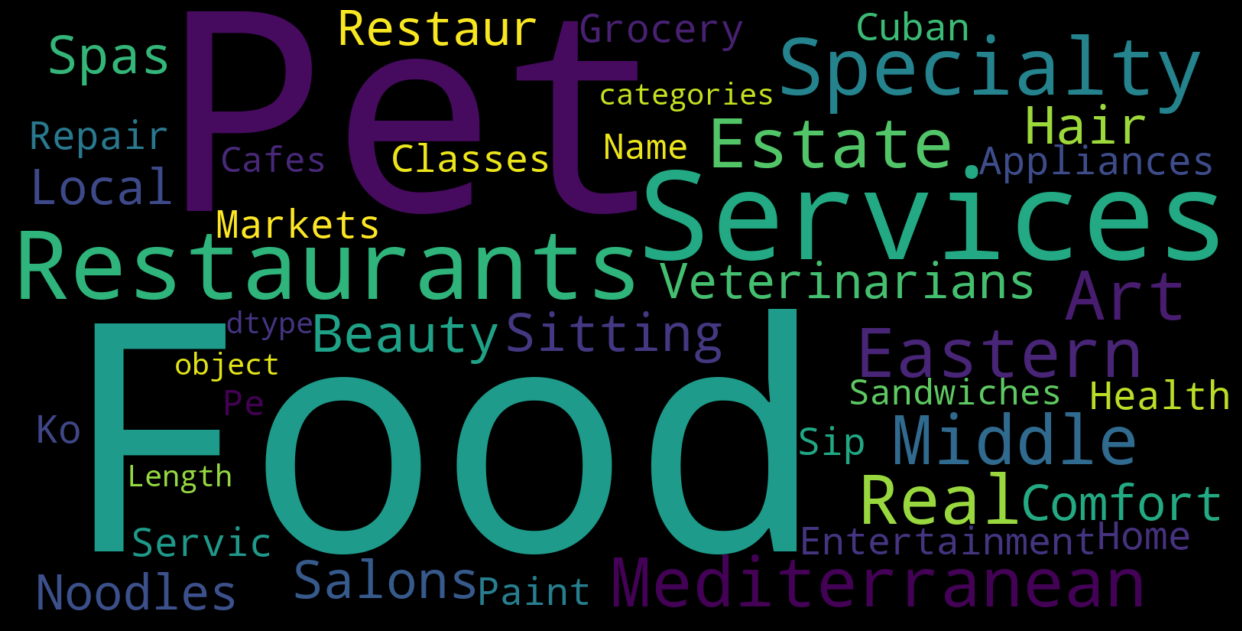

In [56]:
wc = WordCloud(width=1600, height=800, random_state=42, max_words=1000000)

# generation
wc.generate(str(subset_business["categories"]))

plt.figure(figsize=(15,10), facecolor='black')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
